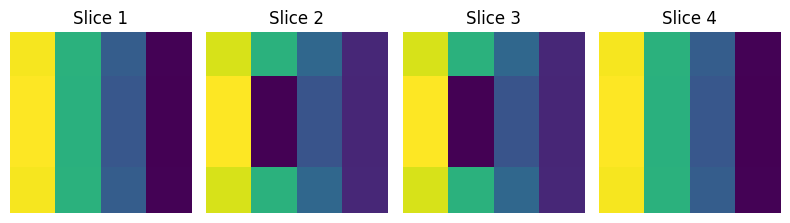

[[-5.0 ,1.0 ,0.0 ,0.0 ,1.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,1.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,],
[1.0 ,-4.0 ,1.0 ,0.0 ,0.0 ,1.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,1.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,],
[0.0 ,1.0 ,-4.0 ,1.0 ,0.0 ,0.0 ,1.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,1.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,],
[0.0 ,0.0 ,1.0 ,-5.0 ,0.

In [1]:
%run linear_matrix_template_generator.ipynb

In [5]:
#condensed_b
sparse_array = {
    "val": val_array,
    "col_idx": col_idx_array,
    "row_ptr": row_ptr_array,
}

In [7]:
X0 = np.linspace(0, 1, num=condensed_b.size, dtype=np.float32)

In [1]:
def calc_residuals(sparse_array, condensed_b, X):
    def row_indexes_iterator():
        for start, stop in zip(sparse_array["row_ptr"][:-1], sparse_array["row_ptr"][1:]):
            yield start, stop
        else:
            yield sparse_array["row_ptr"][-1], sparse_array["val"].size

    residuals = np.zeros(sparse_array["row_ptr"].size, dtype=np.float32)
    for row, (start, stop) in enumerate(row_indexes_iterator()):
        residual = np.float32(0)
        for index in range(start, stop):
            val = sparse_array["val"][index]
            column = sparse_array["col_idx"][index]
            x_val = X[column]
            residual += val * x_val
        residual -= condensed_b[row]
        residuals[row] = residual
    #print(residuals)
    #print((residuals**2).sum())
    return residuals

calc_residuals(sparse_array, condensed_b, X0)


NameError: name 'sparse_array' is not defined

In [28]:
X0 = np.linspace(0, 1, num=condensed_b.size, dtype=np.float32)
for i in range(200):
    residuals = calc_residuals(sparse_array, condensed_b, X0)
    X0 -= residuals/10
print((residuals**2).sum())

1.8775607e-10


In [34]:
def ravel_results(volume, X):
    output = np.zeros(volume.shape, dtype=np.float32)
    i = 0
    w, h, d = volume.shape
    for x, y, z in ((a,b,c) for a in range(w) for b in range(h) for c in range(d)):
        coords = np.array((x, y, z))
        center_c = volume[tuple(coords)]
    
        if center_c == 0:
            continue
        else:
            output[tuple(coords)] = -X[i]
            i += 1

    return output

output = ravel_results(volume, X0)
            

In [35]:
output

array([[[0.8736741 , 0.60226434, 0.33525082, 0.10896807],
        [0.8830534 , 0.6000674 , 0.3148866 , 0.10479525],
        [0.8830534 , 0.6000674 , 0.3148866 , 0.10479525],
        [0.8736741 , 0.60226434, 0.33525082, 0.10896807]],

       [[0.8830534 , 0.6000674 , 0.3148866 , 0.10479525],
        [0.9415266 , 0.        , 0.24329804, 0.10012253],
        [0.9415266 , 0.        , 0.24329804, 0.10012253],
        [0.8830534 , 0.6000674 , 0.3148866 , 0.10479525]],

       [[0.8830534 , 0.6000674 , 0.3148866 , 0.10479525],
        [0.9415266 , 0.        , 0.24329804, 0.10012253],
        [0.9415266 , 0.        , 0.24329804, 0.10012253],
        [0.8830534 , 0.6000674 , 0.3148866 , 0.10479525]],

       [[0.8736741 , 0.60226434, 0.33525082, 0.10896807],
        [0.8830534 , 0.6000674 , 0.3148866 , 0.10479525],
        [0.8830534 , 0.6000674 , 0.3148866 , 0.10479525],
        [0.8736741 , 0.60226434, 0.33525082, 0.10896807]]], dtype=float32)

In [33]:
pressure_field

array([[[0.8736755 , 0.60226804, 0.33525455, 0.10896964],
        [0.8830548 , 0.600071  , 0.31489027, 0.10479682],
        [0.8830548 , 0.600071  , 0.31489027, 0.10479682],
        [0.8736755 , 0.60226804, 0.33525455, 0.10896964]],

       [[0.8830548 , 0.600071  , 0.31489027, 0.10479682],
        [0.94152737, 0.        , 0.24330159, 0.1001242 ],
        [0.94152737, 0.        , 0.24330159, 0.1001242 ],
        [0.8830548 , 0.600071  , 0.31489027, 0.10479682]],

       [[0.8830548 , 0.600071  , 0.31489027, 0.10479682],
        [0.94152737, 0.        , 0.24330159, 0.1001242 ],
        [0.94152737, 0.        , 0.24330159, 0.1001242 ],
        [0.8830548 , 0.600071  , 0.31489027, 0.10479682]],

       [[0.8736755 , 0.60226804, 0.33525455, 0.10896964],
        [0.8830548 , 0.600071  , 0.31489027, 0.10479682],
        [0.8830548 , 0.600071  , 0.31489027, 0.10479682],
        [0.8736755 , 0.60226804, 0.33525455, 0.10896964]]], dtype=float32)